<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/An%C3%A1lise_da_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Violência no Rio de Janeiro**
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)




![img](https://raw.githubusercontent.com/amadords/images/main/criminalidade-rio.png)

A criminalidade sempre foi motivo de preocupação social. O medo e pânico, ora embutido pelos noticiários, ora fruto da realidade à qual se está inserido, trazem muitas vezes o sentimento de insegurança e de injustiça.

Com a crescente conscientização, educação e leis que garantem o acesso à informação, tem se tornado comum a disponibilização de dados (principalmente públicos), em todas esferas e, dentre elas, dados sobre a situação criminal de Cidades e Estados. 

O Governo do Estado do **Rio de Janeiro** é um bom exemplo disso, uma vez que através do [portal ISPDados](http://www.ispdados.rj.gov.br/) nos traz uma gama interessante de dados.

## Obtenção dos Dados

Pelo portal ISPDADOS (mais precisamente [neste](http://www.ispdados.rj.gov.br/estatistica.html) link), podem ser encontrados vários dados estatísticos sobre a Segurança Pública do Rio de Janeiro.

A construção da base de dados é feita através de Boletins de Ocorrência (BO) ou Registros de Ocorrência (RO) feitos nas delegacias do Estado.

Para haver controle de qualidade, os dados são submetidos internamente à Corregedoria Interna da Polícia Civil (COINPOL).


**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np

**Importando os dados**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amadords/data/main/criminalidade_rio.csv')

## Análise de Dados

**Visualização dos primeiros dados**

In [3]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


**Qual o intervalo na base de dados em anos?**

Podemos ver que a base de dados abrange desde o ano 1991 até 2019.

In [4]:
print("Ano inicial: ", df.vano.min())
print("Ano final:   ", df.vano.max())

Ano inicial:  1991
Ano final:    2019


**Qual o tamanho (dimensão) da base de dados?**

In [5]:
print("Variáveis: ", df.shape[1])
print("Entradas:  ", df.shape[0])

Variáveis:  56
Entradas:   344


**Quais os tipos de variáveis?**

É interessante notar que todas as variáveis são do tipo `int` ou `float`, o que não é muito comum em uma base de dados. Isso acontece pois especificamente a base de dados a qual estamos trabalhando tem um enfoque estatístico.

In [6]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

**Qual o percentual de valores ausentes por variável?**

Veja que variáveis como `roubo_bicicleta` têm um percuntual muito alto de valores ausentes. 

Considerando o lapso temporal ao qual estamos trabalhando, é bem capaz de esses valores ausentes serem frutos da falta de contabilização por parte do órgão que gerou o dataset.

Um outro ponto a se considerar é que o Brasil ainda está muito aquém de países com uma forte cultura de dados. Isso significa que fatores como a qualidade das informações, formato dos dados, processo de digitalização, falta de cuidado na coleta dos dados, dentre outros, devem ser levados em consideração na tomada de decisão sobre o que fazer com esses dados.



In [7]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

**Informações estatísticas**

In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Veículos

**Visualizando médias e medianas**

Analisando basicamente roubos, furtos e recuperação de veículos vamos visualizar sua médias e medianas.

Lembrando que quanto mais distante a média da mediana, mais chances de valores exorbitantes estarem "puxando" essa média para aquele lado (seja negativamente ou positivamente).

In [9]:
print("Média:   {}".format(round(df.roubo_veiculo.mean(), 2)))
print("Mediana: {}".format(round(df.roubo_veiculo.median(), 2)))


Média:   2448.7
Mediana: 2322.0


In [10]:
print("Média:   {}".format(round(df.furto_veiculos.mean(), 2)))
print("Mediana: {}".format(round(df.furto_veiculos.median(), 2)))


Média:   1674.67
Mediana: 1637.5


In [11]:
print("Média:   {}".format(round(df.recuperacao_veiculos.mean(), 2)))
print("Mediana: {}".format(round(df.recuperacao_veiculos.median(), 2)))

Média:   1772.24
Mediana: 1755.0


Podemos visualizar também o **percentual** de veiculos recuperados no Estado.

In [12]:
# média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

# total de veículos perdidos
total = df.roubo_veiculo.mean() + df.furto_veiculos.mean()
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100
print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Veículos Recuperados por Mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


### Homicídios

**Verificando meses com menor e maior número de casos**


In [13]:
print("Min:\t{}".format(df.hom_doloso.min()))
print("Max:\t{}".format(df.hom_doloso.max()))

Min:	272
Max:	831


**Verificando o mês com MENOR número de homicídios dolosos**

Junho de 2015.

In [14]:
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


**Verificando o mês com MAIOR número de homicídios dolosos**

Janeiro de 1995.

In [15]:
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


**Frequência de homicídios dolosos**

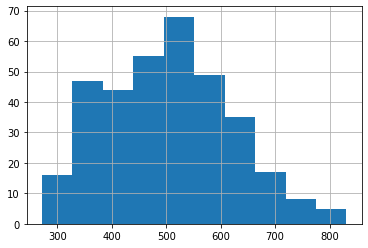

In [16]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();


* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo. (maior número).
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso. (menor número).

**Qual a MÉDIA de ocorrência por mês?**

In [17]:
df['hom_doloso'].groupby(df['mes']).mean()

mes
1     531.206897
2     529.758621
3     566.482759
4     528.482759
5     512.310345
6     469.827586
7     461.000000
8     472.206897
9     474.714286
10    500.571429
11    488.607143
12    518.250000
Name: hom_doloso, dtype: float64

**Qual a MEDIANA de ocorrência por mês?**


In [18]:
df['hom_doloso'].groupby(df['mes']).median()

mes
1     538.0
2     519.0
3     573.0
4     526.0
5     522.0
6     445.0
7     448.0
8     477.0
9     465.0
10    496.0
11    505.5
12    511.0
Name: hom_doloso, dtype: float64

**MEDIANA - MÉDIA**

Seu resultado nos mostra, a diferença entre as medidas.

Como já mencionado antes, quanto mais distante a média da mediana, mais chances de valores exorbitantes estarem "puxando" essa média para aquele lado (seja negativamente ou positivamente).

In [19]:
df['hom_doloso'].groupby(df['mes']).median()-df['hom_doloso'].groupby(df['mes']).mean()

mes
1      6.793103
2    -10.758621
3      6.517241
4     -2.482759
5      9.689655
6    -24.827586
7    -13.000000
8      4.793103
9     -9.714286
10    -4.571429
11    16.892857
12    -7.250000
Name: hom_doloso, dtype: float64

Em dados na casa das centenas, valores em até 24 parecem aceitáveis, ou seja, não número exorbitantes fazendo com que as variáveis sejam tendenciosas para um ou outro lado. 

Porém falando em distribuição dos dados o que o desvio padrão dos dados tem a nos dizer?

**Qual o DESVIO PADRÃO por mês?**

Para um base de dados que gira em torno das centenas, desvios padrões em torno de 100 podem ser considerados um valores expressivos ou altos.

Isso pode ser comprovado através dos valores **máximos** e **mínimos** que orbitam entre 664 e 831 e entre 272 e 345, respectivamente.

In [20]:
df['hom_doloso'].groupby(df['mes']).std()

mes
1     103.002212
2     120.466846
3     124.310849
4     114.006147
5     117.526624
6     119.437392
7     117.777029
8     102.405489
9      95.338328
10    106.706739
11     99.412101
12    109.785186
Name: hom_doloso, dtype: float64

**Qual o MÍNIMO de ocorrência por mês?**

In [21]:
df['hom_doloso'].groupby(df['mes']).min()

mes
1     329
2     323
3     344
4     339
5     345
6     272
7     298
8     294
9     323
10    314
11    325
12    345
Name: hom_doloso, dtype: int64

**Qual o MÁXIMO de ocorrência por mês?**

In [22]:
df['hom_doloso'].groupby(df['mes']).max()

mes
1     831
2     814
3     767
4     788
5     784
6     682
7     702
8     664
9     694
10    761
11    681
12    826
Name: hom_doloso, dtype: int64

**No SOMATÓRIO, quais meses com mais e menos Homicídios Dolosos?**

- Veja que os meses de Março, Janeiro e Fevereiro são os que mais ocorrem o crime,  respectivamente.

- Por outro lado, Setembro, Julho e Junho são os que menos têm ocorrência, respectivamente.

In [23]:
df['hom_doloso'].groupby(df['mes']).sum().sort_values(ascending = False)

mes
3     16428
1     15405
2     15363
4     15326
5     14857
12    14511
10    14016
8     13694
11    13681
6     13625
7     13369
9     13292
Name: hom_doloso, dtype: int64

**Quais os 5 meses com mais ocorrência de Homicidios Dolosos?**

Veja que Janeiro, Dezembro, Fevereiro, Abril e Maio de 1995 foram, respectivamente os meses com mais ocorrências.

In [24]:
df.nlargest(5, 'hom_doloso')

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3
47,1994,12,826,NaN,21,NaN,196,3550,NaN,NaN,NaN,293,165,2012,189,1045,406,42,NaN,NaN,NaN,NaN,NaN,159,4311,1679,571,NaN,NaN,NaN,2712,4962,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,1480,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,847,1451,2012,NaN,3
49,1995,2,814,NaN,16,NaN,179,3286,NaN,NaN,NaN,294,144,1876,118,981,350,32,NaN,NaN,NaN,NaN,NaN,152,3947,1737,465,NaN,NaN,NaN,2519,4721,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,1293,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,830,1331,1876,NaN,3
51,1995,4,788,NaN,20,NaN,170,3028,NaN,NaN,NaN,315,150,2293,86,1033,426,37,NaN,NaN,NaN,NaN,NaN,176,4516,1842,440,NaN,NaN,NaN,2556,4838,NaN,NaN,NaN,NaN,230,NaN,NaN,NaN,1496,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,808,1459,2293,NaN,3
52,1995,5,784,NaN,19,NaN,149,2864,NaN,NaN,NaN,322,158,2178,101,1021,415,26,NaN,NaN,NaN,NaN,NaN,169,4390,1843,441,NaN,NaN,NaN,2815,5099,NaN,NaN,NaN,NaN,192,NaN,NaN,NaN,1615,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,803,1436,2178,NaN,3


**Quais os 5 meses com menos ocorrência de Homicidio Doloso?**

Junho/2015, Agosto/2012, Julho/2012, Julho de 2013 e Julho/2015 foram, respectivamente os meses com menos ocorrências.

In [25]:
df.nsmallest(5, 'hom_doloso')

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3
259,2012,8,294,1.0,11,44.0,349,7328,515.0,220.0,4221.0,422,100,1751,328,4041,345,2,3.0,371.0,7.0,167.0,NaN,919,8456,1309,2552,888.0,1647.0,NaN,8332,14728,2.0,140.0,7.0,3248.0,1644,665.0,813.0,206.0,1395,2361.0,627.0,1515.0,53.0,7025.0,517.0,51,1.0,0.0,0.0,350,4757,1751,60926.0,3
258,2012,7,298,5.0,15,49.0,329,7346,540.0,227.0,4164.0,481,98,1688,265,4163,377,2,1.0,407.0,8.0,141.0,NaN,830,8461,1331,2476,856.0,1560.0,NaN,8429,14652,2.0,196.0,14.0,3245.0,1678,664.0,815.0,235.0,1408,2311.0,589.0,1451.0,43.0,6900.0,524.0,38,2.0,2.0,0.0,367,4947,1688,61308.0,3
270,2013,7,302,1.0,11,36.0,317,6700,480.0,176.0,3941.0,625,141,2242,256,4964,523,3,3.0,470.0,11.0,161.0,NaN,989,10388,1501,3256,947.0,1545.0,NaN,8837,16086,0.0,174.0,13.0,3114.0,1794,663.0,968.0,206.0,1861,2860.0,975.0,1731.0,47.0,6307.0,368.0,36,5.0,1.0,2.0,350,5957,2242,64980.0,3
294,2015,7,306,2.0,9,61.0,484,5711,427.0,146.0,3399.0,595,96,2425,542,4844,602,1,3.0,964.0,8.0,98.0,24.0,1167,11369,1381,2856,852.0,1488.0,220.0,7484,14281,0.0,183.0,11.0,3146.0,2543,1122.0,1230.0,231.0,1905,3028.0,842.0,1802.0,83.0,5917.0,498.0,38,2.0,2.0,0.0,378,6410,2425,63135.0,3


## Conclusão

Nossa base de dados tem 56 categorias, o que nos dá uma grande possibilidade de análise desses dados para diferentes segmentos, com diversas abordagens. Nosso foco foi apenas nos crimes de `Homicídio Doloso` e um pouco sobre roubos e furtos de veículos.

Além do que já foi feito aqui, podem ser exploradas as demais variáveis, alén de se fazer um trabalho de análise gráfica também.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>